In [1]:
import pandas as pd
import numpy as np

In [2]:
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import warnings
warnings.filterwarnings("ignore")

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading maxent_ne_chunker: <urlopen error [Errno
[nltk_data]     11001] getaddrinfo failed>
[nltk_data] Error loading words: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [3]:
columns = ["Id","Entity","Target","Text"]
data = pd.read_csv("E:\T v\data.csv", names=columns,header=None)

In [4]:
data.head()

,Id,Entity,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df = data[["Text","Target"]]

In [6]:
df.head()

,Text,Target
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [7]:
df.shape

(74682, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    73996 non-null  object
 1   Target  74682 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [9]:
df= df.drop_duplicates()


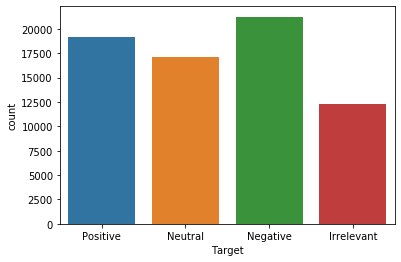

In [10]:
sns.countplot(x="Target",data=df)

In [11]:
sentiment = []

for i in df["Target"]:
    if i == "Positive":
        sentiment.append(1)
    elif (i == "Irrelevant") or (i == "Neutral"):
        sentiment.append(0)
    else:
        sentiment.append(-1)
df["Sentiment"] = sentiment

In [12]:
df.head()

,Text,Target,Sentiment
0,im getting on borderlands and i will murder yo...,Positive,1
1,I am coming to the borders and I will kill you...,Positive,1
2,im getting on borderlands and i will kill you ...,Positive,1
3,im coming on borderlands and i will murder you...,Positive,1
4,im getting on borderlands 2 and i will murder ...,Positive,1


In [13]:
stop_words = set(stopwords.words("english"))

In [14]:
df["Text"] = df["Text"].str.replace("\d","")

In [15]:
def cleaner(data):
    # Tokens
    tokens = word_tokenize(str(data).replace("'", "").lower()) 
    
    # Remove Puncs
    without_punc = [w for w in tokens if w.isalpha()]
    
    # Stopwords
    without_sw = [t for t in without_punc if t not in stop_words]
    
    # Lemmatize
    text_len = [WordNetLemmatizer().lemmatize(t) for t in without_sw]
    # Stem
    text_cleaned = [PorterStemmer().stem(w) for w in text_len]
    
    return " ".join(text_cleaned)

In [16]:
df["Text"] = df["Text"].apply(cleaner)
df["Text"].head()

0     im get borderland murder
1             come border kill
2       im get borderland kill
3    im come borderland murder
4     im get borderland murder
Name: Text, dtype: object

In [17]:
df["Text"]=df["Text"].str.replace("im","")
df["Text"].head()

0      get borderland murder
1           come border kill
2        get borderland kill
3     come borderland murder
4      get borderland murder
Name: Text, dtype: object

In [18]:
rare_words = pd.Series(" ".join(df["Text"]).split()).value_counts()
rare_words

game        10685
play         6769
get          5564
like         5118
go           4211
            ...  
jeopard         1
wom             1
warrenyo        1
lumi            1
unforgiv        1
Length: 22162, dtype: int64

In [19]:
rare_words = rare_words[rare_words <= 2]

In [20]:
df["Text"] = df["Text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

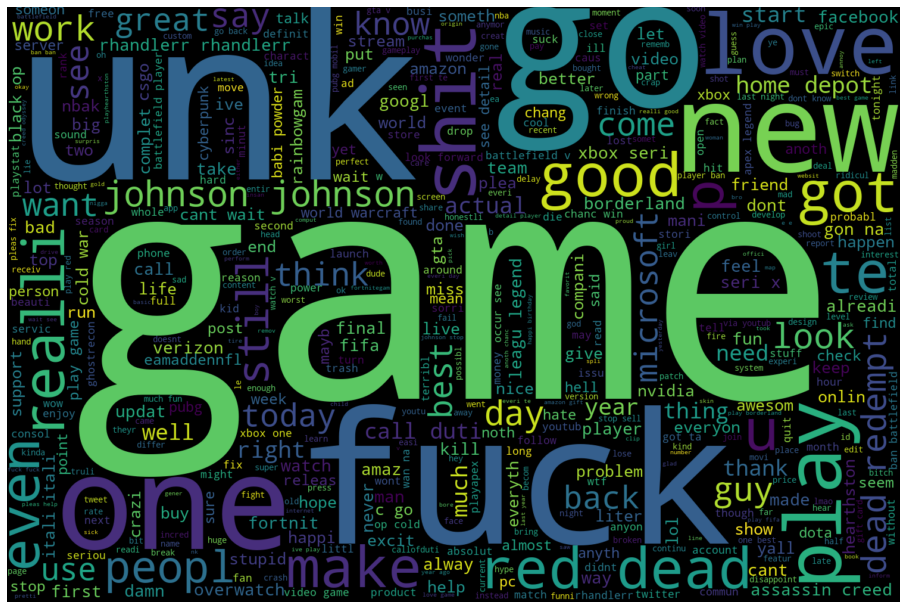

In [21]:
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(df['Text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier

In [23]:
X = df["Text"]
y = df["Sentiment"]

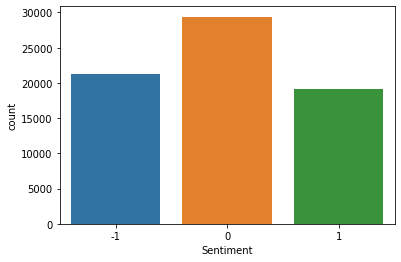

In [24]:
sns.countplot(y,data=df)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30,random_state= 42,stratify = y)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vt = CountVectorizer(analyzer="word")
X_train_count = vt.fit_transform(X_train)
X_test_count = vt.transform(X_test)

In [36]:
print(X_train_count.toarray())
X_train_count

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<48841x13980 sparse matrix of type '<class 'numpy.int64'>'
	with 476729 stored elements in Compressed Sparse Row format>

In [37]:
nb_model = MultinomialNB()
nb_model.fit(X_train_count,y_train)

MultinomialNB()

In [38]:
nb_pred = nb_model.predict(X_test_count)
nb_train_pred = nb_model.predict(X_train_count)

In [43]:
print("X Test")
print(classification_report(y_test,nb_pred))
print("X Train")
print(classification_report(y_train,nb_train_pred))

from sklearn.metrics import confusion_matrix

cm= pd.DataFrame(confusion_matrix(y_test,nb_pred),index=["Actual:-1","Actual:0","Actual:1"],columns=("predicted:-1","predicted:0","predicted:1"))
cm

X Test
              precision    recall  f1-score   support

          -1       0.72      0.77      0.75      6371
           0       0.78      0.71      0.74      8819
           1       0.69      0.73      0.71      5742

    accuracy                           0.73     20932
   macro avg       0.73      0.74      0.73     20932
weighted avg       0.74      0.73      0.73     20932

X Train
              precision    recall  f1-score   support

          -1       0.76      0.81      0.78     14867
           0       0.81      0.75      0.78     20577
           1       0.74      0.77      0.75     13397

    accuracy                           0.77     48841
   macro avg       0.77      0.78      0.77     48841
weighted avg       0.78      0.77      0.77     48841



,predicted:-1,predicted:0,predicted:1
Actual:-1,4910,886,575
Actual:0,1265,6256,1298
Actual:1,634,914,4194


In [32]:
!pip install yellowbrick

In [33]:
from yellowbrick.classifier import PrecisionRecallCurve

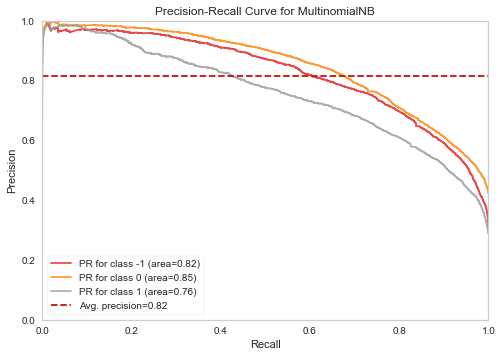

In [34]:
viz = PrecisionRecallCurve(MultinomialNB(),
                           classes=nb_model.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [35]:
# Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
rf_params = {"max_depth": [2,4,6,10,12],
            "max_features": [2,5,7],
            "n_estimators":[12,15,16,]}
rf = RandomForestClassifier()

In [46]:
rf_model_cv = GridSearchCV(rf,rf_params,cv = 5,n_jobs = -1)

In [47]:
rf_model_cv.fit(X_train_count,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 10, 12],
                         'max_features': [2, 5, 7],
                         'n_estimators': [12, 15, 16]})

In [48]:
rf_model_cv.best_params_

{'max_depth': 12, 'max_features': 7, 'n_estimators': 12}

In [49]:
rf_tuned = RandomForestClassifier(max_depth = 12,
                                 max_features = 7,
                                 min_samples_split = 2,
                                 n_estimators = 100).fit(X_train_count,y_train)

In [50]:
rf_pred = rf_tuned.predict(X_test_count)
rf_train_pred = rf_tuned.predict(X_train_count)

X Test
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      6371
           0       0.42      1.00      0.59      8819
           1       0.00      0.00      0.00      5742

    accuracy                           0.42     20932
   macro avg       0.14      0.33      0.20     20932
weighted avg       0.18      0.42      0.25     20932

X Train
              precision    recall  f1-score   support

          -1       1.00      0.00      0.00     14867
           0       0.42      1.00      0.59     20577
           1       0.00      0.00      0.00     13397

    accuracy                           0.42     48841
   macro avg       0.47      0.33      0.20     48841
weighted avg       0.48      0.42      0.25     48841



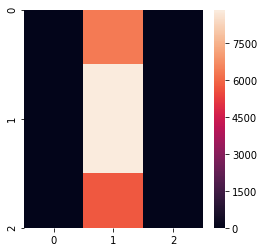

In [54]:
print("X Test")
print(classification_report(y_test,rf_pred))
print("X Train")
print(classification_report(y_train,rf_train_pred))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot = False,fmt = "d")

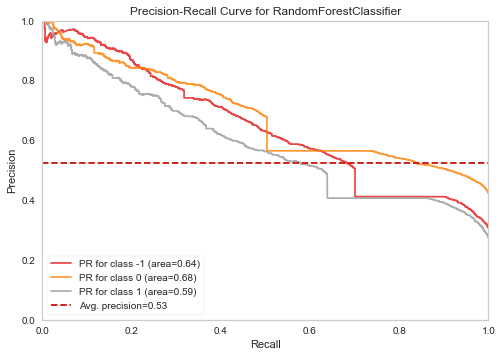

In [44]:
viz = PrecisionRecallCurve(RandomForestClassifier(max_depth = 10,
                                 max_features = 10,
                                 min_samples_split = 2,
                                 n_estimators = 100),
                                 classes=rf_tuned.classes_,
                                 per_class=True,
                                 cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [45]:
#knn

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn_model = knn.fit(X_train_count,y_train)

In [49]:
knn_pred = knn_model.predict(X_test_count)
knn_train_pred = knn_model.predict(X_train_count)

X Test
              precision    recall  f1-score   support

          -1       0.82      0.87      0.84      6371
           0       0.86      0.82      0.84      8819
           1       0.81      0.82      0.81      5742

    accuracy                           0.83     20932
   macro avg       0.83      0.84      0.83     20932
weighted avg       0.84      0.83      0.83     20932

X Train
              precision    recall  f1-score   support

          -1       0.92      0.94      0.93     14867
           0       0.93      0.92      0.92     20577
           1       0.91      0.90      0.91     13397

    accuracy                           0.92     48841
   macro avg       0.92      0.92      0.92     48841
weighted avg       0.92      0.92      0.92     48841



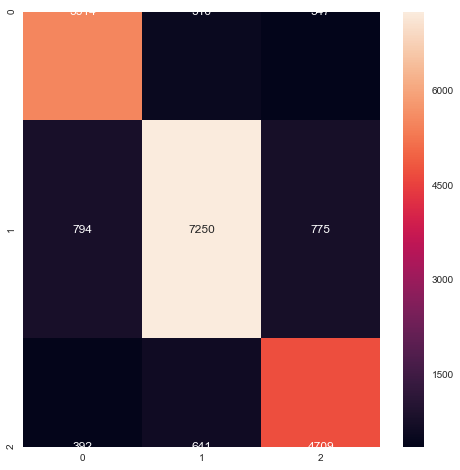

In [50]:
print("X Test")
print(classification_report(y_test,knn_pred))
print("X Train")
print(classification_report(y_train,knn_train_pred))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,knn_pred),annot = True,fmt = "d")

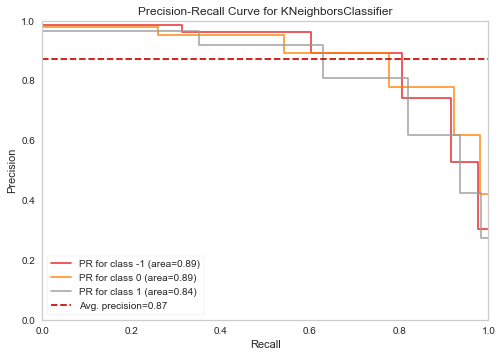

In [51]:
viz = PrecisionRecallCurve(KNeighborsClassifier(),
                           classes=knn_model.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [52]:
from sklearn.svm import SVC

In [53]:
svc_model = SVC().fit(X_train_count,y_train)

KeyboardInterrupt: 

In [ ]:
svc_pred = svc_model.predict(X_test_count)

In [ ]:
svc_train_pred = svc_model.predict(X_train_count)
print("X Test")

In [ ]:
print(classification_report(y_test,svc_pred))

In [ ]:
print("X Train")
print(classification_report(y_train,svc_train_pred))

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,svc_pred),annot = True,fmt = "d")
viz = PrecisionRecallCurve(SVC(),
                           classes=svc_model.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
pred_df = pd.DataFrame({"MultinomialNB":[accuracy_score(y_test,nb_pred)],
                      "Random Forest": [accuracy_score(y_test,rf_pred)],
                      "KNN": [accuracy_score(y_test,knn_pred)]})

train_pred = pd.DataFrame({"MultinomialNB":[accuracy_score(y_train,nb_train_pred)],
                      "Random Forest": [accuracy_score(y_train,rf_train_pred)],
                      "KNN": [accuracy_score(y_train,knn_train_pred)]})

In [ ]:
pred_df.plot(kind="bar")
train_pred.plot(kind="bar")